In [1]:
import sklearn
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


### Clustering
- The goal is to group similar instances together into clusters. 
- Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

### Anomaly detection
- The objective is to learn what “normal” data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

### Density estimation
- This is the task of estimating the probability density function (PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very lowdensity regions are likely to be anomalies. 
- It is also useful for data analysis and visualization.

#### We will start with clustering, using K-Means and DBSCAN, and then we will discuss Gaussian mixture models and see how they can be used for density estimation, clustering, and anomaly detection.

## Clustering
- It is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.
- Just like in classification, each instance gets assigned to a group. However, unlike classification, clustering is an unsupervised task.
#### Classification vs Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

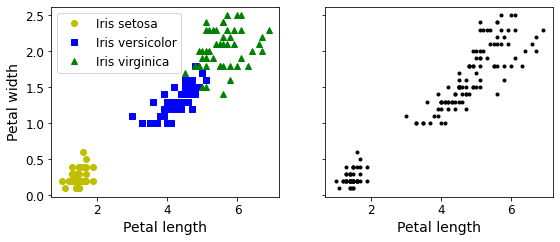

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

- On the left is the iris dataset, where each instance’s species (i.e., its class) is represented with a different marker. 
    - It is a labeled dataset, for which classification algorithms such as Logistic Regression, SVMs, or Random Forest classifiers are well suited. 
- On the right is the same dataset, but **without the labels**, so you cannot use a classification algorithm anymore. 
    - This is where clustering algorithms step in: many of them can easily detect the lower-left cluster.
    - It is also quite easy to see with our own eyes, but it is not so obvious that the upper-right cluster is composed of two distinct sub-clusters. 

#### A **Gaussian mixture** model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

#### Let's map each cluster to a class. Instead of hard coding the mapping, we will pick the most common class for each cluster (using the scipy.stats.mode() function):

In [7]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{2: 0, 0: 1, 1: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [9]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

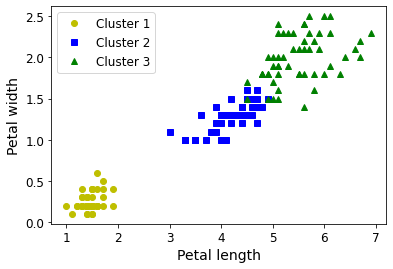

In [10]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

plt.show()

In [11]:
np.sum(y_pred == y)

145

In [12]:
np.sum(y_pred == y) / len(y_pred)

0.9666666666666667

- The dataset has two additional features (sepal length and width), not represented here, and clustering algorithms can make good use of all features, so in fact they identify the three clusters fairly well (e.g., using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster).

#### Clustering is used in a wide variety of applications, including these:
### For Customer Segmentation
- You can cluster your customers based on their purchases and their activity on your website. 
- This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. 
    - For example, customer segmentation can be useful in **recommender systems** to suggest content that other users in the same cluster enjoyed.

### For Data Analysis
- When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately.

### As a Dimensionality Reduction Technique
- Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). 
- Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. 
- If there are k clusters, then this vector is k-dimensional. 
- This vector is typically much lowerdimensional than the original feature vector, but it can preserve enough information for further processing.

### For Anomaly Detection (also called outlier detection)
- Any instance that has a low affinity to all the clusters is likely to be an anomaly. 
    - For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second. 
- Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

### For Semi-Supervised Learning
- If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. 
- This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.

### For Search Engines
- Some search engines let you search for images that are similar to a reference image. 
    - To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster.
    - Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image’s cluster, and you can then simply return all the images from this cluster.

### To segment an image
- By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. 
- Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

***

- There is no universal definition of what a cluster is: it really depends on the context, and different algorithms will capture different kinds of clusters.
- Some algorithms look for instances centered around a particular point, called a **centroid.** 
- Others look for continuous regions of densely packed instances: these clusters can take on any shape. 
- Some algorithms are hierarchical, looking for clusters of clusters. And the list goes on.

## K-Means

In [13]:
from sklearn.datasets import make_blobs

In [14]:
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 1.8],
    [-2.8, 1.3]
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [15]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std= blob_std, random_state=7)

Now let's plot them:

In [16]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

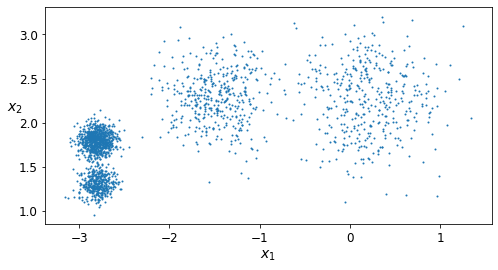

In [17]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

- You can clearly see five blobs of instances. 
- The **K-Means** algorithm is a simple algorithm capable of clustering this kind of dataset very quickly and efficiently, often in just a few iterations. 
    - It was proposed by Stuart Lloyd at Bell Labs in 1957 as a technique for pulse-code modulation, but it was only published outside of the company in 1982. 
    - In 1965, Edward W. Forgy had published virtually the same algorithm, so K-Means is sometimes referred to as Lloyd–Forgy.

### Fit and Predict
Let’s train a K-Means clusterer on this dataset. It will try to find each blob’s center and assign each instance to the closest blob:

In [18]:
from sklearn.cluster import KMeans

In [19]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

- Note that you have to specify the number of clusters k that the algorithm must find. 
    - In this example, it is pretty obvious from looking at the data that k should be set to 5, but in general it is not that easy.

In [20]:
y_pred

array([3, 1, 0, ..., 1, 4, 1])

In [21]:
y_pred is kmeans.labels_

True

- Each instance was assigned to one of the five clusters. 
- In the context of clustering, an instance’s label is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task). 
- **The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable.**

- We can also take a look at the five centroids that the algorithm found:

In [22]:
kmeans.cluster_centers_

array([[ 0.33005816,  1.98345958],
       [-2.80258603,  1.80108628],
       [-1.47934812,  2.2874438 ],
       [-2.80006703,  1.30298291],
       [ 0.05746359,  2.58033628]])

In [23]:
kmeans.labels_

array([3, 1, 0, ..., 1, 4, 1])

You can easily assign new instances to the cluster whose centroid is closest:

In [24]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 1, 1])

### Decision Boundaries
Let's plot the model's decision boundaries. This gives us a **Voronoi diagram**:

In [25]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=40, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

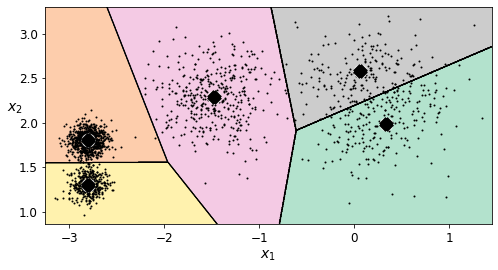

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

- The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled. 
    - Indeed, the K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.
- Instead of **assigning each instance to a single cluster**, which is called **hard clustering**, it can be useful to **give each instance a score per cluster**, which is called **soft clustering**.
- The score can be the distance between the instance and the centroid; conversely, it can be a similarity score (or affinity), such as the Gaussian Radial Basis Function. 
- **In the KMeans class, the transform() method measures the distance from each instance to every centroid:**

In [27]:
kmeans.transform(X_new)

array([[0.33047235, 2.80963611, 1.5070152 , 2.88551697, 0.5831743 ],
       [2.66999307, 5.80599442, 4.48856141, 5.84179855, 2.99921835],
       [3.48175843, 1.21505819, 1.67932083, 1.70875399, 3.08613047],
       [3.36988151, 0.72625937, 1.53543553, 1.21359924, 3.05851885]])

- In this example, **the first instance in X_new is located at a distance of 0.33 from the first centroid, 2.81 from the second centroid, 1.50 from the third centroid, 2.88 from the fourth centroid, and 0.58 from the fifth centroid.** 
- If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique.

## K-Means Algorithm
The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

- First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
- Repeat until convergence (i.e., until the centroids stop moving):
    - Assign each instance to the closest centroid.
    - Update the centroids to be the mean of the instances that are assigned to them.
- The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [28]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, 
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

And let's plot this:

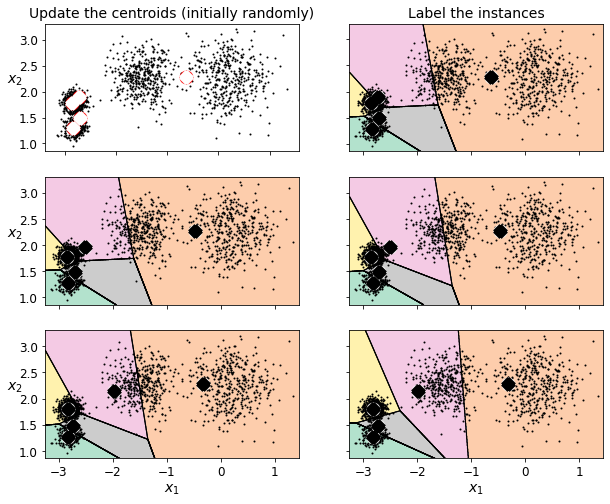

In [29]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color="r", cross_color="w")
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

#### You can see the algorithm in action above: the centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), the instances are relabeled (center right), and so on. 
- As you can see, in just three iterations, the algorithm has reached a clustering that seems close to optimal.
- Although the algorithm is guaranteed to converge, it may not converge to he right solution (i.e., it may converge to a local optimum): whether it does or not depends on the centroid initialization.

### K-Means Variability
- In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.
- **However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:**

In [30]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
    
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

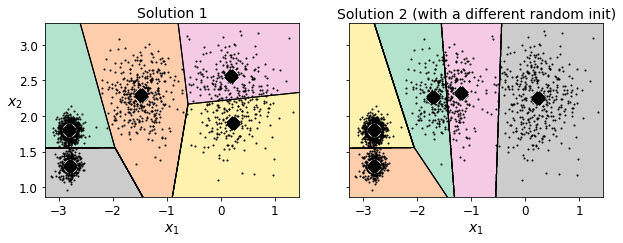

In [31]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

plt.show()

##### Suboptimal solutions due to unlucky centroid initializations

### Inertia
- To select the best model, we will need a way to evaluate a K-Mean model's performance. 
- Unfortunately, clustering is an unsupervised task, so we do not have the targets. 
- But at least we can measure the distance between each instance and its centroid. 
    - This is the idea behind the **inertia** metric:

In [32]:
kmeans.inertia_

169.89333428027635

#### Inertia is the sum of the squared distances between each training instance and its closest centroid:

In [33]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

169.89333428027794

In [34]:
kmeans.score(X)

-169.89333428027635

- The score() method returns the negative inertia. 
- Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule: if a predictor is better than another, its score() method should return a greater score.

### Multiple Initializations
- So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. 
- For example, here are the inertias of the two "bad" models shown in the previous figure:

In [35]:
kmeans_rnd_init1.inertia_

170.3053429407524

In [36]:
kmeans_rnd_init2.inertia_

186.70917442648172

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that **minimizes the inertia**. By default, Scikit-Learn sets n_init=10.

In [37]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10, algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

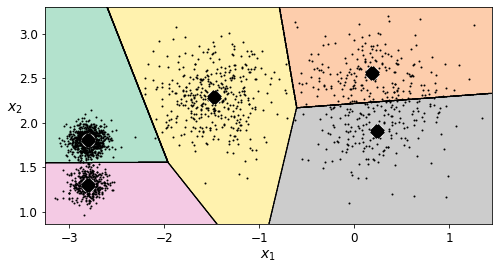

In [38]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## Centroid initialization methods
### K-Means++
Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii:

- Take one centroid $c_1$, chosen uniformly at random from the dataset.
- Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
- Repeat the previous step until all $k$ centroids have been chosen.
The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):
***
#### If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:

In [39]:
KMeans()

KMeans()

In [40]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

186.59767861779704

### Accelerated K-Means
- The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this 2003 paper by Charles Elkan for more details).
- To use Elkan's variant of K-Means, just set **algorithm="elkan".** 
    - Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

In [41]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

236 ms ± 9.42 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [42]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

673 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Mini-Batch K-Means
- Yet another important variant of the K-Means algorithm was proposed in a 2010 paper by David Sculley. Instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. 
- This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. 
- Scikit-Learn implements this algorithm in the MiniBatchKMeans class. 
    - You can just use this class like the KMeans class:

In [43]:
from sklearn.cluster import MiniBatchKMeans

In [44]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [45]:
minibatch_kmeans.inertia_

187.09451511520518

If the dataset does not fit in memory, the simplest option is to use the **memmap** class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:

In [46]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.target = mnist.target.astype(np.int64)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
mnist["data"], mnist["target"], random_state=42)

Next, let's write it to a memmap:

In [48]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype="float32", mode="write", shape=X_train.shape)
X_mm[:] = X_train

In [49]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

If your data is so large that you cannot use memmap, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):

In [50]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Now we can train the model by feeding it one batch at a time. We also need to implement multiple initializations and keep the model with the lowest inertia:

In [51]:
np.random.seed(42)

In [52]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500 # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
    
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [53]:
best_kmeans.score(X)

-172.5354631541569

Mini-batch K-Means is much faster than regular K-Means:

In [54]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

230 ms ± 642 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

31.5 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


That's much faster! However, its performance is often lower (higher inertia), and it keeps degrading as k increases. Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means:

In [56]:
from timeit import timeit

In [57]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

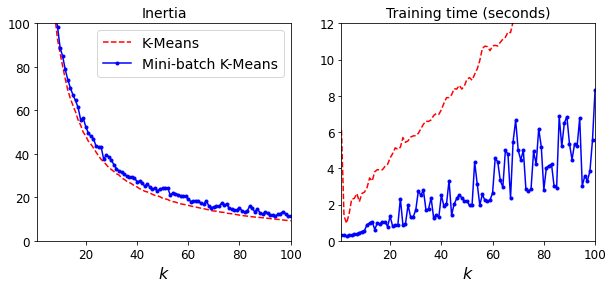

In [58]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 12])

plt.show()

#### Mini-batch K-Means has a higher inertia than K-Means (left) but it is much faster (right), especially as k increases

### Finding the optimal number of clusters
- So far, we have set the number of clusters k to 5 because it was obvious by looking at the data that this was the correct number of clusters. 
    - But in general, it will not be so easy to know how to set k, and the result might be quite bad if you set it to the wrong value.

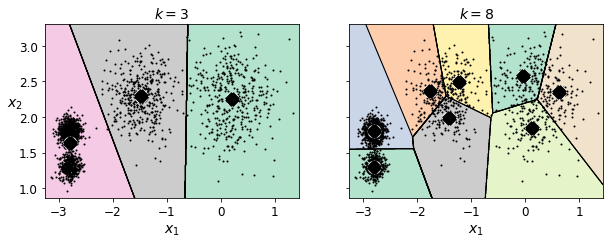

In [59]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Bad choices for the number of clusters: when k is too small, separate clusters get merged, and when k is too large, some clusters get chopped into multiple pieces.

What about their inertias?

In [60]:
kmeans_k3.inertia_

278.81221249238814

In [61]:
kmeans_k8.inertia_

102.65751078804902

#### No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [62]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

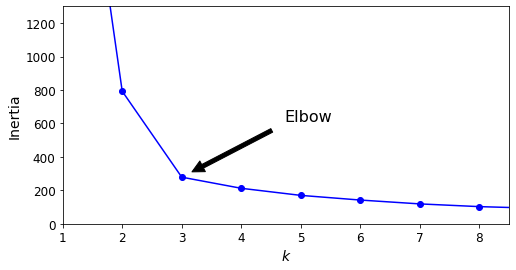

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

- As you can see, there is an elbow at $k=3$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. 
- So $k=3$ is a pretty good choice. 
- Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

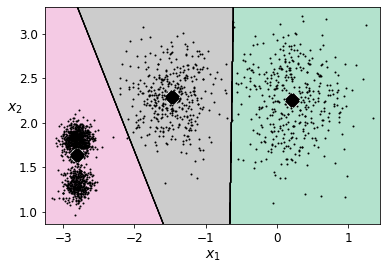

In [64]:
plot_decision_boundaries(kmeans_per_k[3-1], X)
plt.show()

- This technique for choosing the best value for the number of clusters is rather coarse. 
- A more precise approach (but also more computationally expensive) is to use the **silhouette score**, which is the mean silhouette coefficient over all the instances.
- An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 
- The silhouette coefficient can vary between -1 and +1: 
    - a coefficient **close to +1 means that the instance is well inside its own cluster and far from other clusters**, 
    - while a coefficient **close to 0 means that it is close to a cluster boundary**, 
    - and finally a coefficient **close to -1 means that the instance may have been assigned to the wrong cluster**.
- Let's plot the silhouette score as a function of $k$:

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
silhouette_score(X, kmeans.labels_)

0.5563240734346667

In [67]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

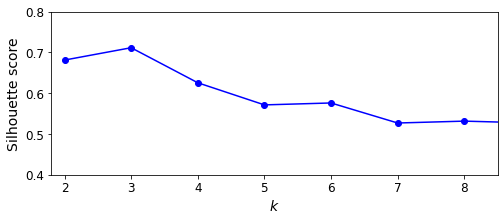

In [68]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.4, 0.8])

plt.show()

- As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=3$ is a very good choice.
- An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. 
    - This is called a **silhouette diagram:**

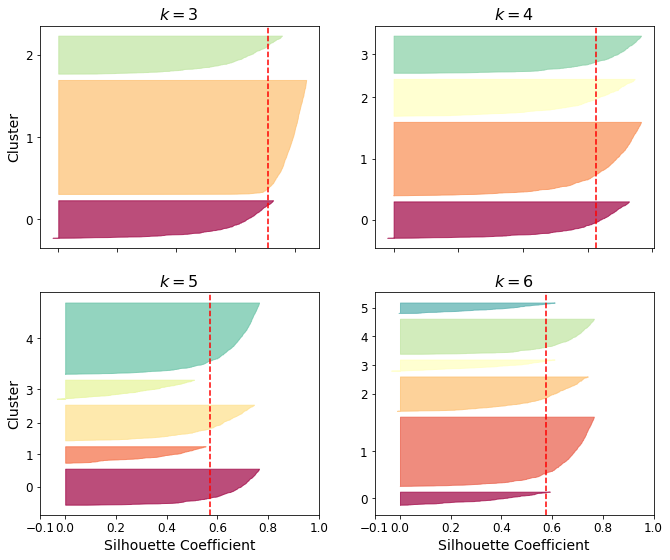

In [69]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). 
- The vertical dashed lines represent the silhouette score for each number of clusters. 
    - When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.
- We can see that when k = 5 and when k = 6, we get bad clusters. 
    - But when k = 3 or k = 4, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k = 3, the cluster at index 1 (the third from the top) is rather big. 
    - When k = 4, all clusters have similar sizes. 
    - **So, even though the overall silhouette score from k = 3 is slightly greater than for k = 4, it seems like a good idea to use k = 4 to get clusters of similar sizes.**

### Limits of K-Means

In [70]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

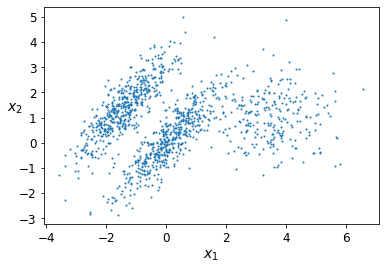

In [71]:
plot_clusters(X)

In [72]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

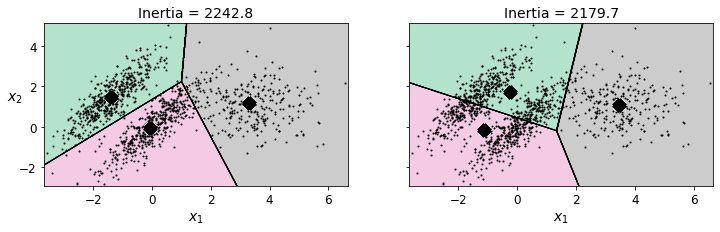

In [73]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

#### K-Means fails to cluster these ellipsoidal blobs properly
- Despite its many merits, most notably being fast and scalable, K-Means is not perfect. 
    - As we saw, it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. 
    - Moreover, K-Means does not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes. 
    - For example, plots above shows how K-Means clusters a dataset containing three ellipsoidal clusters of different dimensions, densities, and orientations.
- As you can see, neither of these solutions is any good. The solution on the left is better, but it still chops off 25% of the middle cluster and assigns it to the cluster on the right. 
    - The solution on the right is just terrible, even though its inertia is lower. So, depending on the data, different clustering algorithms may perform better. 
    - On these types of elliptical clusters, Gaussian mixture models work great.


#### TIP
- It is important to **scale the input features before you run K-Means**, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.
***
#### Now let’s look at a few ways we can benefit from clustering.

### Using Clustering for Image Segmentation
- Image segmentation is the task of partitioning an image into multiple segments.
- **In semantic segmentation, all pixels that are part of the same object type get assigned to the same segment.**
    - For example, in a self-driving car’s vision system, all pixels that are part of a pedestrian’s image might be assigned to the “pedestrian” segment (there would be one segment containing all the pedestrians).
- **In instance segmentation, all pixels that are part of the same individual object are assigned to the same segment.**
    - In this case there would be a different segment for each pedestrian.
- The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks.
- Here, we are going to do something much simpler: **color segmentation.**
- We will simply assign pixels to the same segment if they have a similar color.
    - In some applications, this may be sufficient.
    - For example, if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.
- First, use Matplotlib’s imread() function to load the image:

In [74]:
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1dcb8cd0b08>)

In [75]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

- The image is represented as a 3D array. 
- **The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB).**
    - In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0.0 and 1.0 (or between 0 and 255, if you use imageio.imread()).
- Some images may have fewer channels, such as grayscale images (one channel). 
- And some images may have more channels, such as images with an additional alpha channel for transparency or satellite images, which often contain channels for many light frequencies(e.g., infrared).
- The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means:

In [76]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [77]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

- For example, it may identify a color cluster for all shades of green. 
- Next, for each color (e.g., dark green), it looks for the mean color of the pixel’s color cluster. 
    - For example, all shades of green may be replaced with the same light green color (assuming the mean color of the green cluster is light green). 
- Finally, it reshapes this long list of colors to get the same shape as the original image. And we’re done!

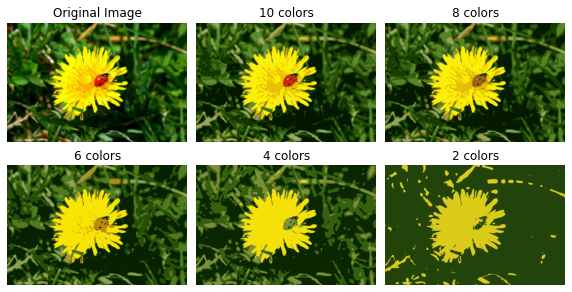

In [78]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis("off")
    
plt.show()

- This outputs the image shown in the upper right above. 
- You can experiment with various numbers of clusters, as shown in the figure. 
- When you use fewer than eight clusters, notice that the ladybug’s flashy red color fails to get a cluster of its own: it gets merged with colors from the environment. 
    - This is because K-Means prefers clusters of similar sizes. 
    - The ladybug is small—much smaller than the rest of the image—so even though its color is flashy, K-Means fails to dedicate a cluster to it.

#### Now let’s look at another application of clustering: preprocessing.

### Using Clustering for Preprocessing
- Clustering can be an efficient approach to **dimensionality reduction**, in particular as a preprocessing step before a supervised learning algorithm.
- As an example of using clustering for dimensionality reduction, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing the digits 0 to 9. 
- First, load the dataset:

In [79]:
from sklearn.datasets import load_digits

In [80]:
X_digits, y_digits = load_digits(return_X_y=True)

Let's split it into a training set and a test set:

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Now let's fit a Logistic Regression model and evaluate it on the test set:

In [82]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

Let’s evaluate its accuracy on the test set:

In [83]:
log_reg.score(X_test, y_test)

0.9688888888888889

- Okay, that's our baseline: 96.89% accuracy. 
- Let's see if we can do better by using K-Means as a preprocessing step. 
    - We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [84]:
from sklearn.pipeline import Pipeline

### WARNING
- Since there are 10 different digits, it is tempting to set the number of clusters to 10.
- However, **each digit can be written several different ways, so it is preferable to use a larger number of clusters**, such as 50.

In [85]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)), 
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [86]:
pipeline.score(X_test, y_test)

0.98

- How about that? We reduced the error rate by almost 30% (from about 3.1% to about 2.2%)!
- But we chose the number of clusters k arbitrarily; we can surely do better.
- Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for k is much simpler than earlier. 
- There’s no need to perform silhouette analysis or minimize the inertia; **the best value of k is simply the one that results in the best classification performance during cross-validation.** 
- We can use GridSearchCV to find the optimal number of clusters:

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   4.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   5.5s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   7.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   7.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   7.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   8.1s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   7.1s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=  13.8s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=  15.0s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=  12.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  13.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  11.8s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  12.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=  11.8s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=  17.9s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=  17.7s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  14.0s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  16.6s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  12.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  16.5s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  17.1s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=  16.0s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  17.6s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  16.8s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  14.1s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  15.9s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  19.1s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  13.9s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   9.8s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  10.3s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  10.4s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 58.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [89]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [90]:
grid_clf.score(X_test, y_test)

0.98

### Using Clustering for Semi-Supervised Learning
- Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. 
- Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [91]:
n_labeled = 50

In [92]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

- It's much less than earlier of course. 
- Let's see how we can do better. 
    - First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. 
    - We will call these images the representative images:

In [93]:
k = 50

In [94]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Now let's plot these representative images and label them manually:

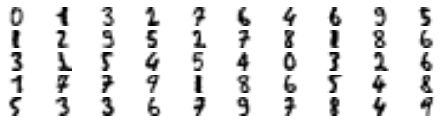

In [95]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index +1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")

plt.show()

In [96]:
y_train[representative_digit_idx]

array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 1,
       5, 4, 5, 4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6,
       7, 9, 7, 8, 4, 9])

In [97]:
y_representative_digits = np.array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 1,
       5, 4, 5, 4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6,
       7, 9, 7, 8, 4, 9])

- Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [98]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9244444444444444

- Wow! We jumped from 83.3% accuracy to 92.4%, although we are still only training the model on 50 instances. 
- Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.
- But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [99]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [100]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [101]:
log_reg.score(X_test, y_test)

0.9377777777777778

- We got a tiny little accuracy boost. 
- Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. 
    - Let's only propagate the labels to the 75th percentile closest to the centroid:

In [102]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [103]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [104]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [105]:
log_reg.score(X_test, y_test)

0.9266666666666666

- A bit better. With just 50 labeled instances (just 5 examples per class on average!), we got 92.6% performance, which is getting closer to the performance of logistic regression on the fully labeled digits dataset (which was 96.9%).
- This is because the propagated labels are actually pretty good: their accuracy is close to 98%:

In [106]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9741293532338309

### ACTIVE LEARNING
- To continue improving your model and your training set, the next step could be to do a few rounds of **active learning, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them.** 
- There are many different strategies for active learning, but one of the most common ones is called **uncertainty sampling.**
- Here is how it works:
    1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
    2. The instances for which the model is most uncertain (i.e., when its estimated probability is lowest) are given to the expert to be labeled.
    3. You iterate this process until the performance improvement stops being worth the labeling effort.
- Other strategies include labeling the instances that would result in the largest model change, or the largest drop in the model’s validation error, or the instances that different models disagree on (e.g., an SVM or a Random Forest).
***

- Let’s take a look at DBSCAN, another popular clustering algorithm that illustrates a very different approach based on local density estimation. 
- This approach allows the algorithm to identify clusters of arbitrary shapes.
### DBSCAN
This algorithm defines clusters as continuous regions of high density. Here is how it works:
- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. 
    - This region is called the instance’s ε-neighborhood.
- If an instance has at least min_samples instances in its ε- neighborhood (including itself), then it is considered a core instance. 
    - In other words, core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same cluster. 
    - This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.
#### This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as you might expect. Let’s test it on the moons dataset

In [107]:
from sklearn.datasets import make_moons

In [108]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [109]:
from sklearn.cluster import DBSCAN

In [110]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

- The labels of all the instances are now available in the labels_ instance variable:

In [111]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

- Notice that some instances have a **cluster index equal to –1**, which means that they are considered as **anomalies** by the algorithm.
- The indices of the core instances are available in the **core_sample_indices_** instance variable, and the core instances themselves are available in the **components_** instance variable:

In [112]:
len(dbscan.core_sample_indices_)

808

In [113]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [114]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [115]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [116]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [117]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker="o", s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

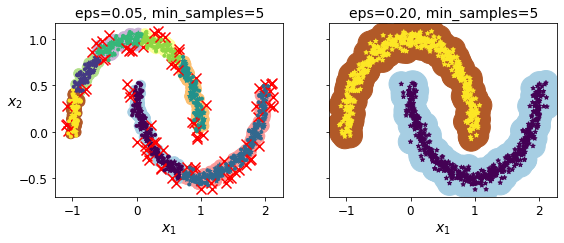

In [118]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

#### DBSCAN clustering using two different neighborhood radiuses

This clustering is represented in the lefthand plot above. 
- As you can see, it identified quite a lot of anomalies, plus seven different clusters.
- How disappointing! **Fortunately, if we widen each instance’s neighborhood by increasing eps to 0.2, we get the clustering on the right, which looks perfect.**
- Let’s continue with this model.

- Somewhat surprisingly, the **DBSCAN class does not have a predict() method**, although it has a fit_predict() method. 
    - In other words, it cannot predict which cluster a new instance belongs to. 
    - This implementation decision was made because different classification algorithms can be better for different tasks, so the authors decided to let the user choose which one to use. 
- Moreover, it’s not hard to implement. For example, let’s train a KNeighborsClassifier:

In [119]:
dbscan = dbscan2

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [122]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [123]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

- Note that we only trained the classifier on the core instances, but we could also have chosen to train it on all the instances, or all but the anomalies: this choice depends on the final task.

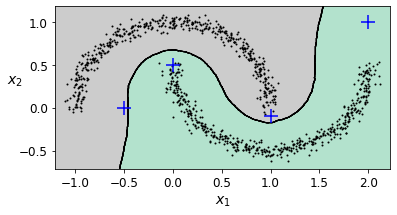

In [124]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

#### Decision boundary between two clusters

- The decision boundary is represented above (the crosses represent the four instances in X_new). 
- Notice that **since there is no anomaly in the training set, the classifier always chooses a cluster, even when that cluster is far away.** 
    - **It is fairly straightforward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies.** 
    - To do this, use the **kneighbors()** method of the KNeighborsClassifier. 
    - Given a set of instances, **it returns the distances and the indices of the k nearest neighbors** in the training set (two matrices, each with k columns):

In [125]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1
y_pred

array([[-1],
       [ 0],
       [ 1],
       [-1]], dtype=int64)

In [126]:
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

- In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. 
- It is robust to outliers, and it has just two hyperparameters (eps and min_samples). 
- **If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly.** 
- Its computational complexity is roughly O(m log m), making it pretty close to linear with regard to the number of instances, but Scikit-Learn’s implementation can require up to O(m²) memory if eps is large.

#### Now let’s dive into Gaussian mixture models, which can be used for density estimation, clustering, and anomaly detection.

## Gaussian Mixtures
- A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.
- All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.
    - Each cluster can have a different ellipsoidal shape, size, density, and orientation.
- When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of these distributions are.

In [127]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Let's train a Gaussian mixture model on the previous dataset:

In [128]:
from sklearn.mixture import GaussianMixture

In [129]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Let’s look at the parameters that the algorithm estimated:

In [130]:
gm.weights_

array([0.39054348, 0.2093669 , 0.40008962])

In [131]:
gm.means_

array([[ 0.05224874,  0.07631976],
       [ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873]])

In [132]:
gm.covariances_

array([[[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]]])

- Great, it worked fine! Indeed, the weights that were used to generate the data were 0.2, 0.4, and 0.4; and similarly, the means and covariance matrices were very close to those found by the algorithm. 
- But how? This class relies on the **Expectation-Maximization (EM) algorithm**, which has many similarities with the K-Means algorithm:
    - **it also initializes the cluster parameters randomly, then it repeats two steps until convergence, first assigning instances to clusters (this is called the expectation step) and then updating the clusters (this is called the maximization step).**
    - In the context of clustering, you can think of EM as a generalization of K-Means that not only finds the cluster centers, but also their size, shape, and orientation, as well as their relative weights.
    - Unlike K-Means, though, EM uses soft cluster assignments, not hard assignments.
        - For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). 
        - Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. 
        - These probabilities are called the **responsibilities of the clusters for the instances.**
        - During the maximization step, each cluster’s update will mostly be impacted by the instances it is most responsible for.

### WARNING
- Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution. 
    - This is why we set n_init to 10. 
    - Be careful: by default n_init is set to 1.
***
#### You can check whether or not the algorithm converged and how many iterations it took:

In [133]:
gm.converged_

True

In [134]:
gm.n_iter_

4

- Now that you have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the **most likely cluster (hard clustering)** or **estimate the probability that it belongs to a particular cluster (soft clustering).** 
    - Just use the **predict() method for hard clustering**, or the **predict_proba() method for soft clustering:**

In [135]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [136]:
gm.predict_proba(X)

array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
       [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
       [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
       ...,
       [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
       [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
       [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]])

#### A Gaussian mixture model is a generative model, meaning you can sample new instances from it (note that they are ordered by cluster index):

In [137]:
X_new, y_new = gm.sample(n_samples=6)
X_new

array([[-0.8690223 , -0.32680051],
       [ 0.29945755,  0.2841852 ],
       [ 1.85027284,  2.06556913],
       [ 3.98260019,  1.50041446],
       [ 3.82006355,  0.53143606],
       [-1.04015332,  0.7864941 ]])

In [138]:
y_new

array([0, 0, 1, 1, 1, 2])

- It is also possible to estimate the density of the model at any given location.
- This is achieved using the **score_samples()** method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location. 
    - **The greater the score, the higher the density:**

In [139]:
gm.score_samples(X)

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

Let's check that the PDF integrates to 1 over the whole space. 
- We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). 
    - The result is very close to 1:

In [140]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.999999999927159

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [141]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

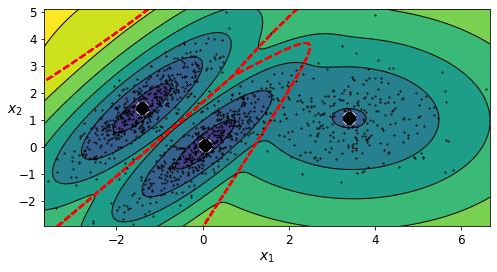

In [142]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

#### Cluster means, decision boundaries, and density contours of a trained Gaussian mixture model

- Nice! The algorithm clearly found an excellent solution. Of course, we made its task easy by generating the data using a set of 2D Gaussian distributions (unfortunately, real-life data is not always so Gaussian and low-dimensional). 
    - We also gave the algorithm the correct number of clusters. 
- When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution.
    - You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. 
- One way to do this is to limit the range of shapes and orientations that the clusters can have. 
    - This can be achieved by imposing constraints on the covariance matrices. 
    - To do this, set the covariance_type hyperparameter to one of the following values:
- **"full" (default)**: no constraint, all clusters can take on any ellipsoidal shape of any size.
- **"tied"**: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
- **"spherical"**: all clusters must be spherical, but they can have different diameters (i.e., different variances).
- **"diag"**: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [143]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [144]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

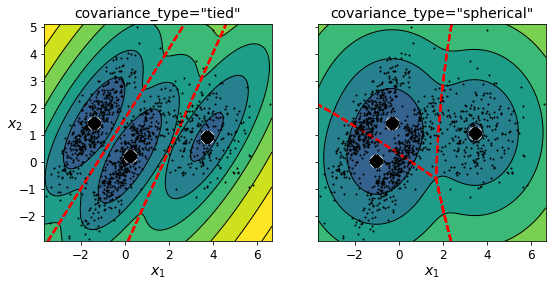

In [145]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

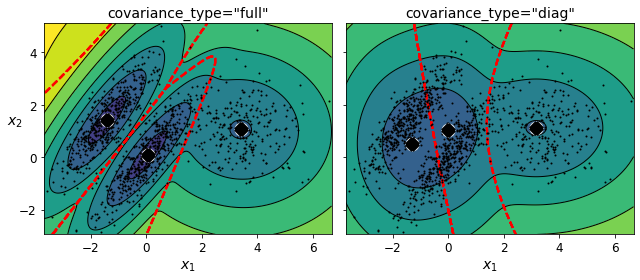

In [146]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Anomaly Detection using Gaussian Mixtures
- Gaussian Mixtures can be used for anomaly detection: **instances located in low-density regions can be considered anomalies.** 
- You must define what density threshold you want to use. 
    - For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. 
    - Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [147]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

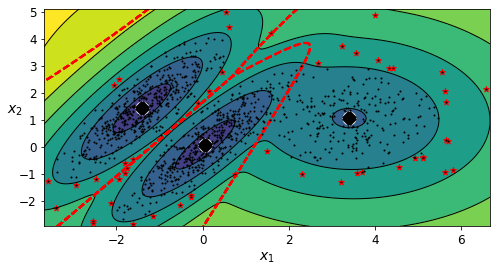

In [148]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="r", marker="*")
plt.ylim(top=5.1)

plt.show()

### TIP
**Gaussian mixture models try to fit all the data, including the outliers,** so if you have too many of them, this will bias the model’s view of “normality,” and some outliers may wrongly be considered as normal. If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset.

#### Just like K-Means, the GaussianMixture algorithm requires you to specify the number of clusters. So, how can you find it?
### Model selection
- We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. 
- Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

- $m$ is the number of instances.
- $p$ is the number of parameters learned by the model.
- $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [149]:
gm.bic(X)

8189.662685850681

In [150]:
gm.aic(X)

8102.437405735643

We could compute the BIC manually like this:

In [151]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [152]:
bic, aic

(8189.662685850681, 8102.437405735643)

In [153]:
n_params

17

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [154]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]

In [155]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

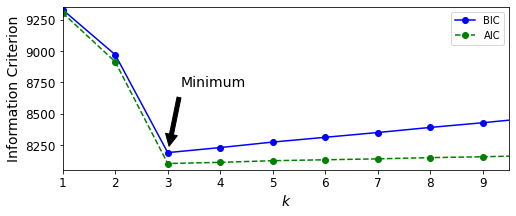

In [156]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

plt.show()

Let's search for best combination of values for both the number of clusters and the covariance_type hyperparameter:

In [157]:
min_bic = np.infty

for k in range(1, 11):
    for covarience_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, 
                              covariance_type=covarience_type, random_state=42).fit(X).bic(X)
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covarience_type = covarience_type

In [158]:
best_k

3

In [159]:
best_covarience_type

'full'

## Variational Bayesian Gaussian Mixtures
- Rather than manually searching for the optimal number of clusters, it is possible to use instead the **BayesianGaussianMixture** class which is capable of giving weights equal (or close) to zero to unnecessary clusters. 
- Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.
- Gaussian mixture models work great on clusters with ellipsoidal shapes.

In [160]:
from sklearn.mixture import BayesianGaussianMixture

In [161]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

C:\Users\batuh\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

The algorithm automatically detected that only 3 components are needed:

In [162]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

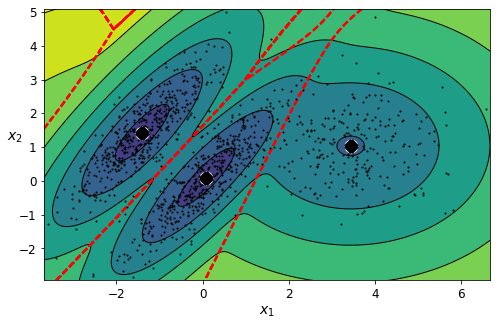

In [163]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [164]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [165]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [166]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

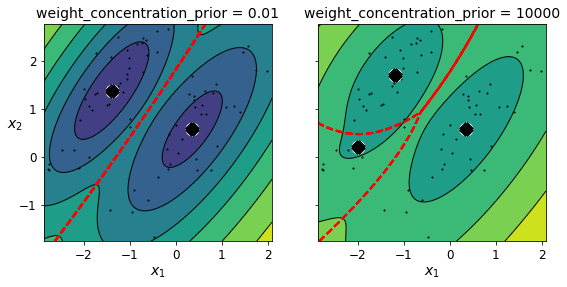

In [167]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

Note: the fact that you see only 3 regions in the right plot although there are 4 centroids is not a bug. The weight of the top-right cluster is much larger than the weight of the lower-right cluster, so the probability that any given point in this region belongs to the top right cluster is greater than the probability that it belongs to the lower-right cluster.

In [168]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [169]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

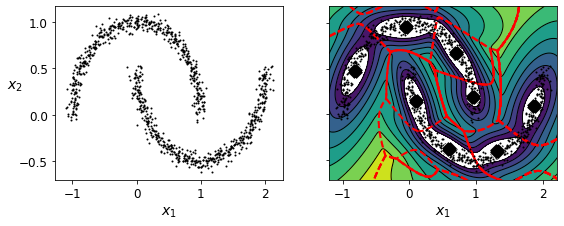

In [170]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

#### Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

## Exercises
### 10. Cluster the Olivetti Faces Dataset
The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function.

In [171]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\batuh\scikit_learn_data


In [172]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [173]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

Exercise: Then split it into a training set, a validation set, and a test set (note that the dataset is **already scaled between 0 and 1**).**Since the dataset is quite small**, you probably want to use **stratified sampling** to ensure that there are the same number of images per person in each set.

In [180]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [185]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


#### To speed things up, we'll reduce the data's dimensionality using PCA:

In [188]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

Exercise: Next, cluster the images using K-Means, and ensure that you have a good number of clusters

In [190]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k = {}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145


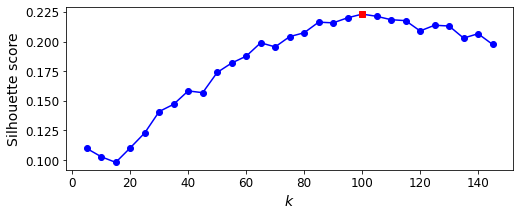

In [192]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")

plt.show()

In [193]:
best_k

100

It looks like the best number of clusters is quite high, at 100. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

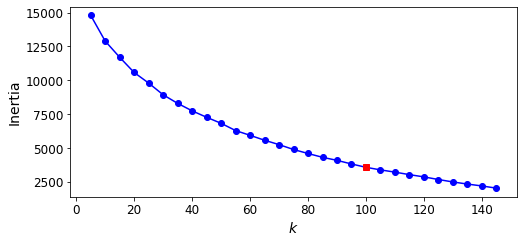

In [194]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [195]:
best_model = kmeans_per_k[best_index]

Exercise: Visualize the clusters: do you see similar faces in each cluster?

Cluster  0


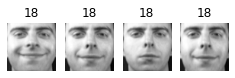

Cluster  1


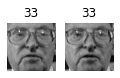

Cluster  2


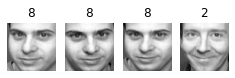

Cluster  3


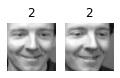

Cluster  4


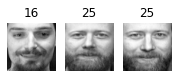

Cluster  5


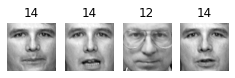

Cluster  6


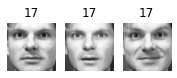

Cluster  7


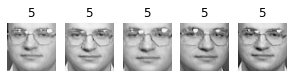

Cluster  8


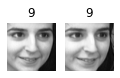

Cluster  9


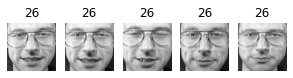

Cluster  10


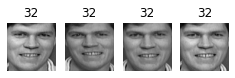

Cluster  11


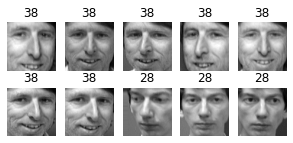

Cluster  12


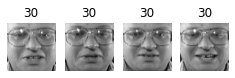

Cluster  13


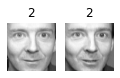

Cluster  14


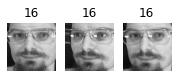

Cluster  15


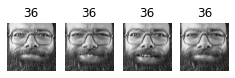

Cluster  16


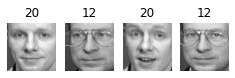

Cluster  17


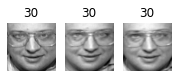

Cluster  18


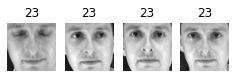

Cluster  19


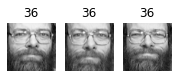

Cluster  20


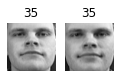

Cluster  21


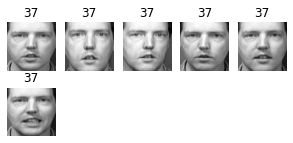

Cluster  22


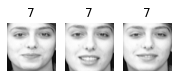

Cluster  23


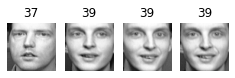

Cluster  24


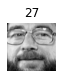

Cluster  25


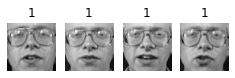

Cluster  26


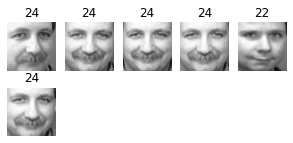

Cluster  27


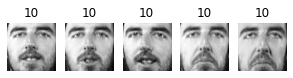

Cluster  28


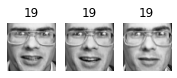

Cluster  29


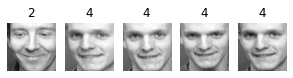

Cluster  30


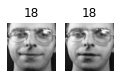

Cluster  31


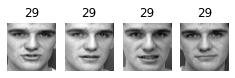

Cluster  32


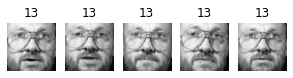

Cluster  33


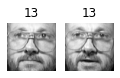

Cluster  34


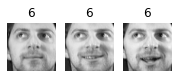

Cluster  35


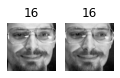

Cluster  36


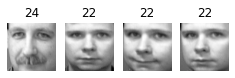

Cluster  37


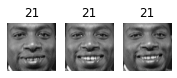

Cluster  38


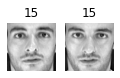

Cluster  39


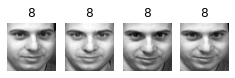

Cluster  40


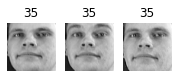

Cluster  41


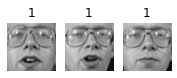

Cluster  42


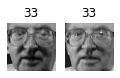

Cluster  43


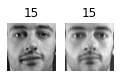

Cluster  44


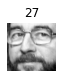

Cluster  45


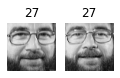

Cluster  46


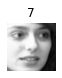

Cluster  47


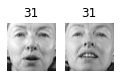

Cluster  48


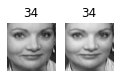

Cluster  49


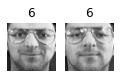

Cluster  50


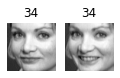

Cluster  51


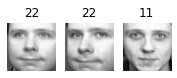

Cluster  52


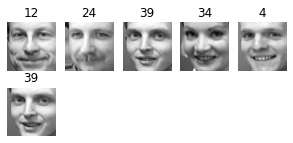

Cluster  53


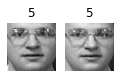

Cluster  54


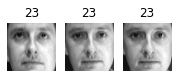

Cluster  55


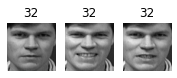

Cluster  56


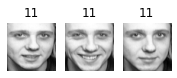

Cluster  57


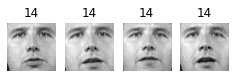

Cluster  58


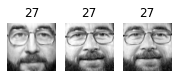

Cluster  59


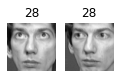

Cluster  60


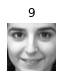

Cluster  61


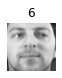

Cluster  62


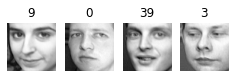

Cluster  63


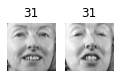

Cluster  64


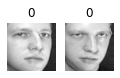

Cluster  65


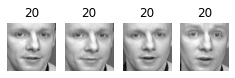

Cluster  66


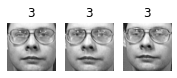

Cluster  67


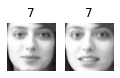

Cluster  68


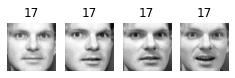

Cluster  69


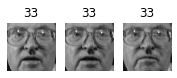

Cluster  70


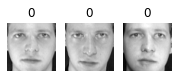

Cluster  71


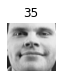

Cluster  72


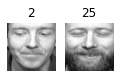

Cluster  73


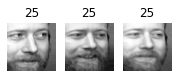

Cluster  74


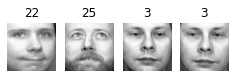

Cluster  75


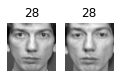

Cluster  76


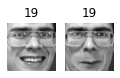

Cluster  77


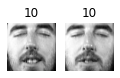

Cluster  78


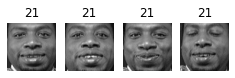

Cluster  79


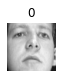

Cluster  80


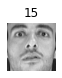

Cluster  81


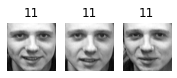

Cluster  82


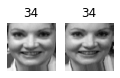

Cluster  83


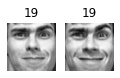

Cluster  84


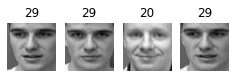

Cluster  85


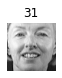

Cluster  86


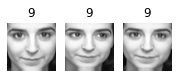

Cluster  87


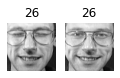

Cluster  88


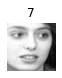

Cluster  89


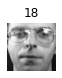

Cluster  90


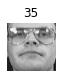

Cluster  91


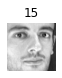

Cluster  92


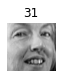

Cluster  93


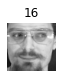

Cluster  94


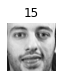

Cluster  95


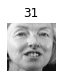

Cluster  96


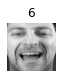

Cluster  97


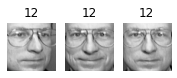

Cluster  98


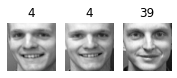

Cluster  99


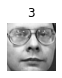

In [196]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
for cluster_id in np.unique(best_model.labels_):
    print("Cluster ", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

**Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.**

### Exercise  11. Using Clustering as Preprocessing for Classification
Exercise: Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [198]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9

Exercise: Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.

In [199]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

0.75

Yikes! That's not better at all! Let's see if tuning the number of clusters helps.

#### Exercise: Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?

We could use a GridSearchCV like we did earlier in this notebook, but since we already have a validation set, we don't need K-fold cross-validation, and we're only exploring a single hyperparameter, so it's simpler to just run a loop manually:

In [200]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)), 
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4125
10 0.525
15 0.5375
20 0.6375
25 0.65
30 0.6375
35 0.675
40 0.7375
45 0.725
50 0.75
55 0.7375
60 0.725
65 0.7375
70 0.725
75 0.725
80 0.7375
85 0.7375
90 0.7375
95 0.75
100 0.75
105 0.75
110 0.7375
115 0.7375
120 0.75
125 0.75
130 0.725
135 0.75
140 0.7625
145 0.7375


Oh well, even by tuning the number of clusters, we never get beyond 80% accuracy. Looks like the distances to the cluster centroids are not as informative as the original images.

#### Exercise: What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [201]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [202]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.825

That's a bit better, but still worse than without the cluster features. The clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances).

### Exercise 12. A Gaussian Mixture Model for the Olivetti Faces Dataset
Exercise: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).

In [203]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

Exercise: Use the model to generate some new faces (using the **sample()** method), and visualize them **(if you used PCA, you will need to use its inverse_transform() method).**

In [204]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

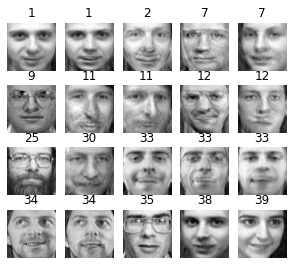

In [205]:
plot_faces(gen_faces, y_gen_faces)

Exercise: Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies).

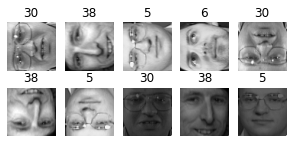

In [206]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [207]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [208]:
gm.score_samples(X_bad_faces_pca)

array([-1.79997363e+07, -2.26427267e+07, -3.96415690e+07, -4.60254352e+07,
       -3.13975313e+07, -1.39330390e+07, -2.90883025e+07, -1.06298732e+08,
       -1.20931259e+08, -7.49741209e+07])

The bad faces are all considered highly unlikely by the Gaussian Mixture model. Compare this to the scores of some training instances:

In [209]:
gm.score_samples(X_train_pca[:10])

array([1163.02020964, 1149.16682296, 1148.47710684, 1170.67602772,
       1088.46009598, 1075.71700409, 1075.71700844, 1088.46008974,
       1096.42609707, 1119.6862704 ])

### Exercise 13. Using Dimensionality Reduction Techniques for Anomaly Detection
Exercise: Some dimensionality reduction techniques can also be used for anomaly detection. 
- For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. 
    - Then compute the reconstruction error for each image. 
    - Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. 
    - If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

We already reduced the dataset using PCA earlier:

In [210]:
X_train_pca

array([[ 3.78079820e+00, -1.85479033e+00, -5.14404488e+00, ...,
        -1.35627195e-01, -2.14086086e-01,  6.11934103e-02],
       [ 1.01488543e+01, -1.52753913e+00, -7.66991436e-01, ...,
         1.23928137e-01, -1.35267496e-01, -2.32708380e-02],
       [-1.00152922e+01,  2.87727547e+00, -9.19881105e-01, ...,
         7.26147294e-02, -2.96680164e-03,  1.24886386e-01],
       ...,
       [ 2.47587466e+00,  2.95597076e+00,  1.29985368e+00, ...,
        -2.09071618e-02,  3.48544270e-02, -1.54327676e-01],
       [-3.22031641e+00,  5.34898043e+00,  1.39427185e+00, ...,
         5.75491823e-02, -2.28316471e-01,  1.55566067e-01],
       [-9.22877192e-01, -3.64702868e+00,  2.26088142e+00, ...,
         1.36850014e-01, -6.91338032e-02,  6.26891628e-02]], dtype=float32)

In [211]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [212]:
reconstruction_errors(pca, X_train).mean()

0.00019205349

In [213]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0047073537

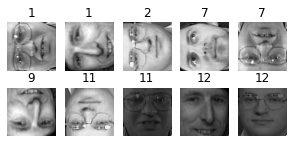

In [214]:
plot_faces(X_bad_faces, y_gen_faces)

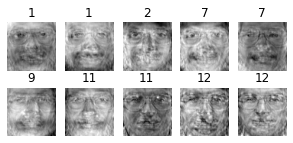

In [215]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)